
Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults: This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.


Context:
The Open Access Series of Imaging Studies (OASIS) is a project aimed at making MRI data sets of the brain freely available to the scientific community. By compiling and freely distributing MRI data sets, we hope to facilitate future discoveries in basic and clinical neuroscience. OASIS is made available by the Washington University Alzheimer’s Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)( at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University School of Medicine, and the Biomedical Informatics Research Network (BIRN).


Data: 


*   ID: Identification (cat)
*   M/F: Gender (cat)
*   Hand: Dominant Hand (cat: R or L)
*   Age: Age in Years (num)
*   Educ: Education Level (cat: 1-5)
*   SES: Socioeconomic status (cat: 1-5)
*   MMSE: Mini Mental State Evaluation (num)
*   CDR: Clinical Dementia Rating (cat: 0-2)
*   eTIV: Estimated Total Intercranial Volume (num)
*   nWBV: Normalized Whole Brain Volume (num)
*   ATS: Atlas Scaling Factor (num)
*   Delay: ?












In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Exploratory Data Analysis

In [276]:
cross_sec_filepath= '/content/drive/My Drive/data for colab/mri and alzheimers/datasets_1980_3398_oasis_cross-sectional.csv'
raw_data=pd.read_csv(cross_sec_filepath)
raw_data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [277]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [278]:
#check for null values
raw_data.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [279]:
raw_data.CDR.unique()

array([0. , 0.5, nan, 1. , 2. ])

CDR is the target variable, which contains 4 classes (0, 0.5, 1, 2). There are only 235 non-null CDR values, therefore only these data will be used to train and validate the model. Later, we could predict CDR in the remaining data, but with no validation. 

In [280]:
raw_data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [281]:
raw_data.Hand.unique()

array(['R'], dtype=object)

This dataset only contains right-handed individuals, so we can drop this column.

In [282]:
data=raw_data.dropna(axis=0, subset=['CDR'])
data=data.drop('Hand', axis=1)
data=data.drop('ID',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 415
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     235 non-null    object 
 1   Age     235 non-null    int64  
 2   Educ    235 non-null    float64
 3   SES     216 non-null    float64
 4   MMSE    235 non-null    float64
 5   CDR     235 non-null    float64
 6   eTIV    235 non-null    int64  
 7   nWBV    235 non-null    float64
 8   ASF     235 non-null    float64
 9   Delay   0 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 20.2+ KB


In [283]:
#no non-null values for "delay", so drop this column too
data=data.drop('Delay', axis=1)

In [284]:
data['M/F'].unique()

array(['F', 'M'], dtype=object)

M/F will have to be one-hot encoded. 

In [285]:
#what's the distribution of dementia ratings among this dataset?
data.CDR.value_counts()

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

This data is skewed towards lower values of CDR. We will have to consider this when evaluating models. Precision and recall should be the primary metrics, instead of accuracy.  



In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     235 non-null    object 
 1   Age     235 non-null    int64  
 2   Educ    235 non-null    float64
 3   SES     216 non-null    float64
 4   MMSE    235 non-null    float64
 5   CDR     235 non-null    float64
 6   eTIV    235 non-null    int64  
 7   nWBV    235 non-null    float64
 8   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 18.4+ KB


SES is the only category with null values now. How should we impute them?

count    216.000000
mean       2.490741
std        1.120593
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

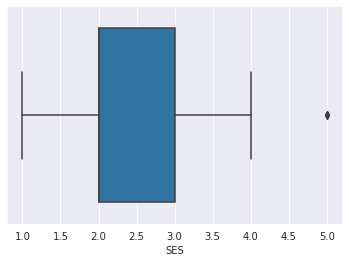

In [287]:
sns.boxplot(x=data.SES)
data.SES.describe()

Since there is only one outlier, SES is categorical, and the dataset is relatively small, we'll try KNN imputer to start.

In [288]:

#Let's look at the pairplots
#sns.set_style('darkgrid')
#sns.pairplot(data, diag_kind="kde")


eTIV and ASF are related by definition. This mulitcolinearity shouldn't be a problem if we use tree classificiation, but let's remove ASF for now anyway.

In [289]:
data=data.drop('ASF', axis=1)

There doesn't appear to be any apparent correlations between CDR and other variables. Age and nWBV are negatively correlated. Let's build a simple model without added interaction features for now. 

Lambda value used for Transformation: 6.479097841625844


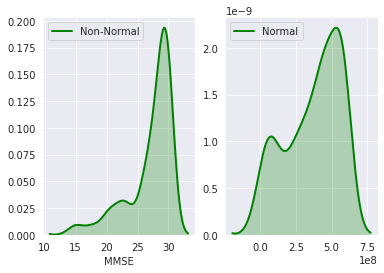

In [290]:
#let's transform MMSE data since it's distribution is left skewed
from scipy.stats import boxcox

original_data=data['MMSE']
# transform training data & save lambda value 
fitted_data, fitted_lambda = boxcox(original_data) 
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(original_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
print("Lambda value used for Transformation: {}".format(fitted_lambda)) 


In [291]:
#replace MMSE column with transformed data
transformedMMSE=pd.Series(fitted_data)
transformedMMSE.index = data.index
data['MMSE']=transformedMMSE

##Preprocessing

1. Separate target variable + Train test split
2. One-hot encode M/F
3. KNN Imputer on missing values in SES
4. Scale numerical variables: MMSE, nWBV, eTIV

In [292]:
#separate target variable (CDR) from features

data1=data.copy()
y=data1.CDR.copy()
X=data1.drop('CDR', axis=1)

(array([135.,   0.,  70.,   0.,   0.,  28.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

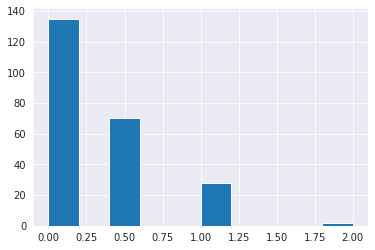

In [293]:
plt.hist(y)

In [294]:
X.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV
0,F,74,2.0,3.0,4.607923e+08,1344,0.743
1,F,55,4.0,1.0,4.607923e+08,1147,0.810
2,F,73,4.0,3.0,2.900223e+08,1454,0.708
8,M,74,5.0,2.0,5.739824e+08,1636,0.689
9,F,52,3.0,2.0,5.739824e+08,1321,0.827


In [295]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=6)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(188, 7) (188,)
(47, 7) (47,)


In [296]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore')

#fit the encoder to training data, and transform training and test data
OH_train_data=encoder.fit_transform(X_train[['M/F']]).toarray()
OH_test_data=encoder.transform(X_test[['M/F']]).toarray()
categories=encoder.categories_[0].tolist()

OH_train_data=pd.DataFrame(OH_train_data,columns=categories)
OH_test_data=pd.DataFrame(OH_test_data,columns=categories)

OH_train_data.index = X_train.index
OH_test_data.index = X_test.index

#remove original M/F column from X 
num_X_train=X_train.drop('M/F', axis=1)
num_X_test=X_test.drop('M/F', axis=1)

#concatenate one hot encoded series to X
OH_X_train = pd.concat([num_X_train, OH_train_data], axis=1)
OH_X_test = pd.concat([num_X_test, OH_test_data], axis=1)


In [297]:
#impute missing values for SES using KNN
from sklearn.impute import KNNImputer

imputer=KNNImputer()
imp_train_data=pd.DataFrame(imputer.fit_transform(X_train[['SES']]))
imp_test_data=pd.DataFrame(imputer.transform(X_test[['SES']]))

imp_train_data.index = X_train.index
imp_test_data.index = X_test.index

#replace previous column with new imputed column
OH_X_train['SES']=imp_train_data
OH_X_test['SES']=imp_test_data

In [298]:
#MMSE, nWBV, eTIV all appear to be normally distributed so we will use standard scaler
scaler=StandardScaler()

num_cols=['MMSE', 'nWBV', 'eTIV']
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train[num_cols]))
scaled_X_test=pd.DataFrame(scaler.transform(X_test[num_cols]))

scaled_X_train.index = X_train.index
scaled_X_test.index = X_test.index

OH_X_train[num_cols]=scaled_X_train
OH_X_test[num_cols]=scaled_X_test

In [299]:
#renaming final processed datasets
X_train_processed=OH_X_train.copy()
X_test_processed=OH_X_test.copy()


In [300]:
#target data is currently in 4 categories: 0, 0.5, 1 and 2. Since 0.5 is a float and not an int, classifier models won't like this
#we will need to map output to new values

y_train_processed=y_train.map({0:0, 0.5:1, 1:2, 2:3}).astype(int)
y_test_processed=y_test.map({0:0, 0.5:1, 1:2, 2:3}).astype(int)
#new output for CDR is 0, 1, 2, 3 instead of 0, 0.5, 1, and 2

##Exploring Models

1. Train several classifiers using default params 
2. k-fold cross validation for each model
3. Compare performance of each model
4. Investigate feature importance 
5. Feature engineering

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

#create default models for initial comparison
forest_df=RandomForestClassifier(random_state=6)
logistic_df=LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=6) #params changed in order to converge on a multiclass target 
xgb_df=XGBClassifier(random_state=6)
nb_df=BernoulliNB()
svc_df= SVC(kernel='linear', random_state=6) #default kernel (rbf) gave a much lower score, so tried others and linear was comparable

In [302]:
from sklearn.model_selection import cross_val_score

models= [forest_df, logistic_df, xgb_df, nb_df, svc_df]
for model in models:
  score = cross_val_score(model, X_train_processed, y_train_processed, scoring='f1_weighted')
  model_name = type(model).__name__
  print('Model:{}, Average score and std dev across 5 folds {:0.2}(+/{:0.2})'.format(model_name, score.mean(), score.std()))

Model:RandomForestClassifier, Average score and std dev across 5 folds 0.72(+/0.049)
Model:LogisticRegression, Average score and std dev across 5 folds 0.7(+/0.042)
Model:XGBClassifier, Average score and std dev across 5 folds 0.7(+/0.033)
Model:BernoulliNB, Average score and std dev across 5 folds 0.65(+/0.025)
Model:SVC, Average score and std dev across 5 folds 0.7(+/0.069)


With mostly default parameters, the models all have similar cross validation scores 

In [303]:
#generate confusion matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
def conf_matrix(model, X, y, Xtest, ytest):
  model.fit(X,y)
  preds=model.predict(Xtest)
  prec=precision_score(y_test_processed, preds,
                       average='weighted',
                       zero_division=1)
  rec=recall_score(y_test_processed,preds,
                   average='weighted',
                   zero_division=1)
  f1=f1_score(y_test_processed, preds,
                       average='weighted')

  cm=plot_confusion_matrix(model,Xtest,ytest,
                           labels=[0,1,2,3],
                           cmap=plt.cm.Blues)

  model_name=type(model).__name__
  cm.ax_.set_title(model_name)

  print('Model: {:<25} Precision: {:<10.2} Recall: {:<10.2} F1 on Test Set: {:<10.2}'.format(model_name,prec,rec,f1))
  return cm

Model: RandomForestClassifier    Precision: 0.7        Recall: 0.66       F1 on Test Set: 0.65      
Model: LogisticRegression        Precision: 0.73       Recall: 0.68       F1 on Test Set: 0.67      
Model: XGBClassifier             Precision: 0.68       Recall: 0.6        F1 on Test Set: 0.6       
Model: BernoulliNB               Precision: 0.74       Recall: 0.7        F1 on Test Set: 0.64      
Model: SVC                       Precision: 0.73       Recall: 0.66       F1 on Test Set: 0.66      


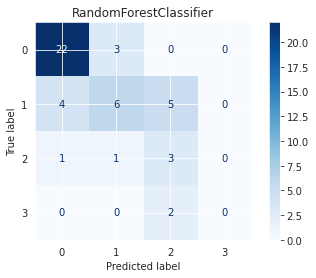

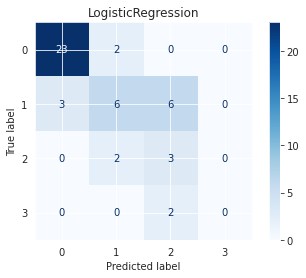

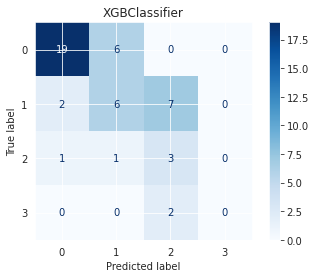

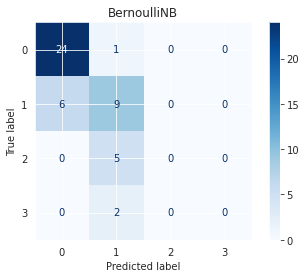

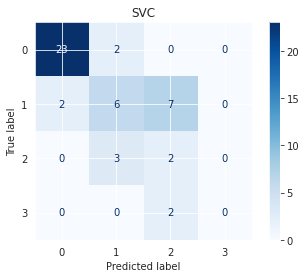

In [304]:
for model in models:
  conf_matrix(model, X_train_processed, y_train_processed, X_test_processed, y_test_processed)

[0.16517994 0.06830279 0.07515902 0.29729337 0.14828966 0.20406565
 0.01941103 0.02229854]


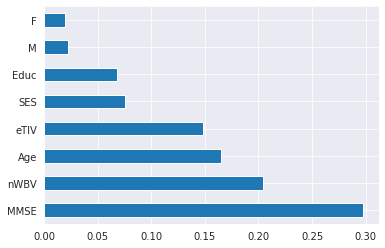

In [305]:
#quickly see what the most important features are for the random forest model using feature_importances
forest_df.fit(X_train_processed,y_train_processed)
print(forest_df.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest_df.feature_importances_, index=X_train_processed.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

feature importances may be biased to high cardinality features [sklearn docs]. We will try using permutation feature importance as well. "This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature." We can also use it for non-tree based classifiers.

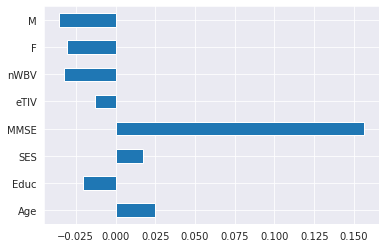

In [306]:
#try with random forest first
from sklearn.inspection import permutation_importance

r = permutation_importance(forest_df, X_test_processed, y_test_processed,
                           n_repeats=30,
                           random_state=0)
p_importances = pd.Series(r.importances_mean, index=X_train_processed.columns)
p_importances.plot(kind='barh')
plt.show()


The negative scores indicate that substituting the features with random permutations (noise) are better than the original features. Based on this assessment, MMSE, SES, and Age are the probably the most important features in this model. Let's look at the other models too.

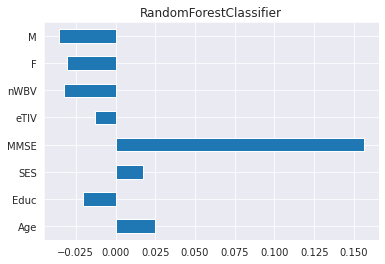

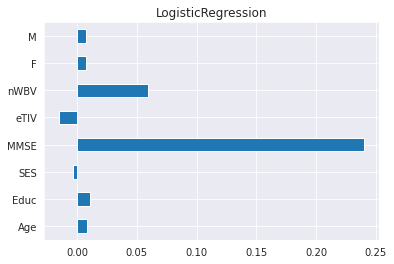

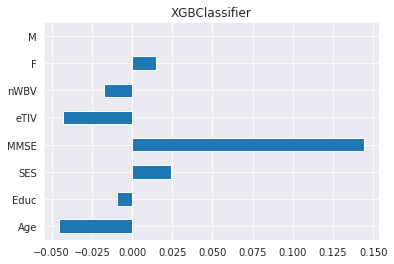

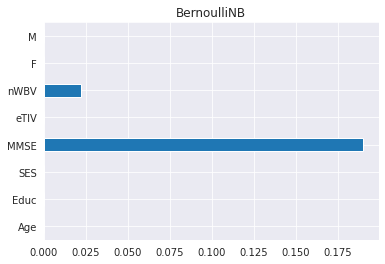

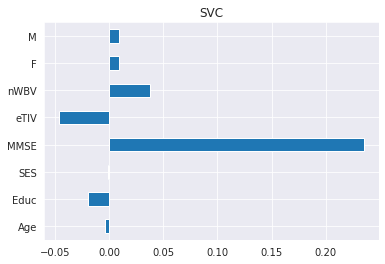

In [307]:
for model in models: 
  model_name = type(model).__name__
  model.fit(X_train_processed, y_train_processed)
  r = permutation_importance(model, X_test_processed, y_test_processed,
                           n_repeats=30,
                           random_state=0)
  p_importances = pd.Series(r.importances_mean, index=X_train_processed.columns)
  p_importances.plot(kind='barh')
  plt.title(model_name)
  plt.show()


The features affect each model differently. However, MMSE seems to be the most important for each. 
Let's re-train the models, using only features with permutation importance > 0, then compare their new cross val scores. 

In [308]:
cols={} #a dictionary that will contain the model names as keys, and important features as a list for that key
for model in models:
  model_name = type(model).__name__
  model.fit(X_train_processed, y_train_processed)
  r = permutation_importance(model, X_test_processed, y_test_processed,
                           n_repeats=30,
                           random_state=0)
  key=model_name
  cols.setdefault(key,[])
  for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] > 0:
      cols[key].append(X_test_processed.columns[i])


In [309]:
cols

{'BernoulliNB': ['MMSE', 'nWBV'],
 'LogisticRegression': ['MMSE', 'nWBV', 'Educ', 'Age', 'M', 'F'],
 'RandomForestClassifier': ['MMSE', 'Age', 'SES'],
 'SVC': ['MMSE', 'nWBV', 'M', 'F'],
 'XGBClassifier': ['MMSE', 'SES', 'F']}

Model: RandomForestClassifier    Precision: 0.7        Recall: 0.62       F1 on Test Set: 0.63      
Model: RandomForestClassifier    Average score and std dev across 5 folds 0.69(+/0.088)
Model: LogisticRegression        Precision: 0.78       Recall: 0.72       F1 on Test Set: 0.72      
Model: LogisticRegression        Average score and std dev across 5 folds 0.72(+/0.048)
Model: XGBClassifier             Precision: 0.73       Recall: 0.66       F1 on Test Set: 0.66      
Model: XGBClassifier             Average score and std dev across 5 folds 0.7(+/0.072)
Model: BernoulliNB               Precision: 0.74       Recall: 0.7        F1 on Test Set: 0.64      
Model: BernoulliNB               Average score and std dev across 5 folds 0.65(+/0.041)
Model: SVC                       Precision: 0.76       Recall: 0.7        F1 on Test Set: 0.7       
Model: SVC                       Average score and std dev across 5 folds 0.72(+/0.049)


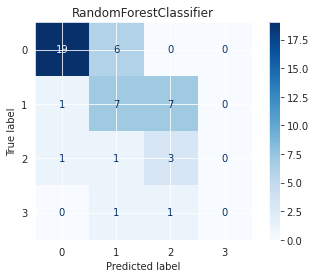

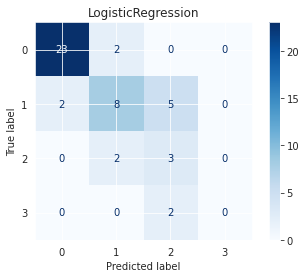

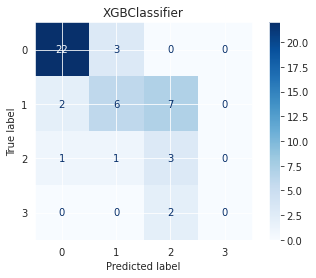

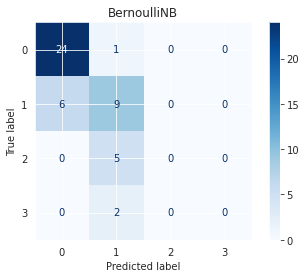

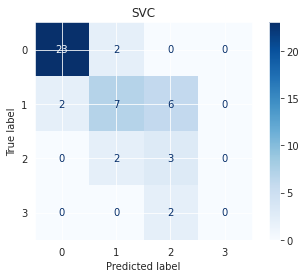

In [310]:
for model in models:
  model_name = type(model).__name__
  imp_cols=cols[model_name]

  score = cross_val_score(model, X_train_processed[imp_cols], y_train_processed, scoring='f1_weighted')
  model_name = type(model).__name__

  conf_matrix(model, X_train_processed[imp_cols], y_train_processed, X_test_processed[imp_cols], y_test_processed)
  print('Model: {:<25} Average score and std dev across 5 folds {:0.2}(+/{:0.2})'.format(model_name, score.mean(), score.std()))

Dropping the less important features doesn't appear to have improved model performance. 


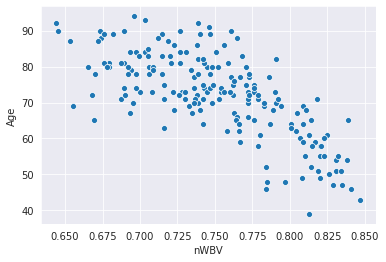

In [311]:
#let's revisit the nWBV and Age relationship
sns.scatterplot(x=X_train['nWBV'], y=X_train['Age'])

In [312]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X_train['nWBV'], X_train['Age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.718


Since Age and nWBV are pretty strongly negatively correlated, maybe removing one of them will improve cross validation scores if overfitting was a problem. 

In [313]:
#modify cols dictionary to get rid of Age
cols_mod=cols.copy()
for key, item in cols_mod.items(): 
  if 'Age' in item:
    item.remove('Age')
print(cols_mod)

{'RandomForestClassifier': ['MMSE', 'SES'], 'LogisticRegression': ['MMSE', 'nWBV', 'Educ', 'M', 'F'], 'XGBClassifier': ['MMSE', 'SES', 'F'], 'BernoulliNB': ['MMSE', 'nWBV'], 'SVC': ['MMSE', 'nWBV', 'M', 'F']}


Model: RandomForestClassifier    Precision: 0.73       Recall: 0.66       F1 on Test Set: 0.66      
Model: RandomForestClassifier    Average score and std dev across 5 folds 0.65(+/0.054)
Model: LogisticRegression        Precision: 0.78       Recall: 0.72       F1 on Test Set: 0.72      
Model: LogisticRegression        Average score and std dev across 5 folds 0.71(+/0.043)
Model: XGBClassifier             Precision: 0.73       Recall: 0.66       F1 on Test Set: 0.66      
Model: XGBClassifier             Average score and std dev across 5 folds 0.7(+/0.072)
Model: BernoulliNB               Precision: 0.74       Recall: 0.7        F1 on Test Set: 0.64      
Model: BernoulliNB               Average score and std dev across 5 folds 0.65(+/0.041)
Model: SVC                       Precision: 0.76       Recall: 0.7        F1 on Test Set: 0.7       
Model: SVC                       Average score and std dev across 5 folds 0.72(+/0.049)


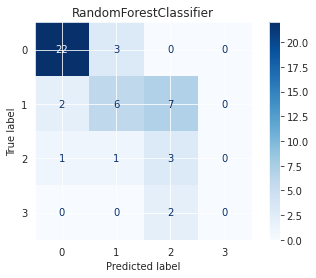

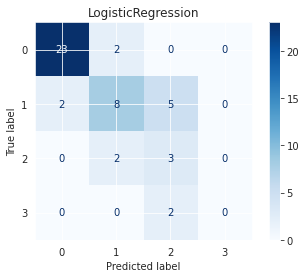

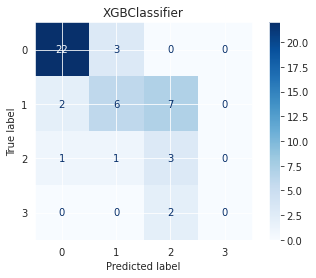

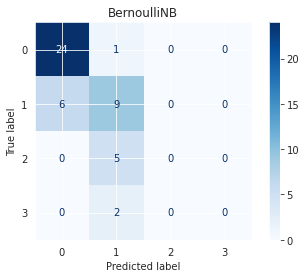

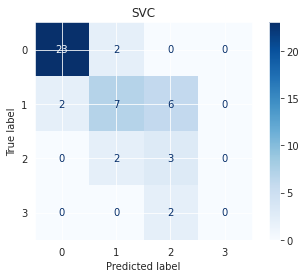

In [314]:
for model in models:
  model_name = type(model).__name__
  imp_cols=cols_mod[model_name]

  score = cross_val_score(model, X_train_processed[imp_cols], y_train_processed, scoring='f1_weighted')
  model_name = type(model).__name__
  conf_matrix(model, X_train_processed[imp_cols], y_train_processed, X_test_processed[imp_cols], y_test_processed)
  print('Model: {:<25} Average score and std dev across 5 folds {:0.2}(+/{:0.2})'.format(model_name, score.mean(), score.std()))

Again there is not much change in the performance of the models. Since they are all performing at similar levels, we'll try and tune the hyperparameters of a couple to see if we can improve the score any more. 

#Tuning hyperparameters


SVC and logistic regression classifiers have given the highest precision and recall scores. We will try to tune their hyperparameters in order to further improve performance. 

In [315]:
#logistic regression had the best precision and recall when only using most important features and without "Age", so we will try that with the C value found in GridSearch
logistic_cols= cols[type(logistic_df).__name__]
logistic_cols

['MMSE', 'nWBV', 'Educ', 'M', 'F']

In [316]:
from sklearn.model_selection import GridSearchCV

lr_base = LogisticRegression(solver='newton-cg', multi_class='multinomial')
lr_params = {'C': [0.001,.009,0.01,.09,1,5,10,15,25,30]} #we will try to determine what the best value for regularization parameter is

lr_gs = GridSearchCV(lr_base, lr_params, cv=2, verbose=2, n_jobs=-1)
lr_gs.fit(X_train_processed[logistic_cols], y_train_processed)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 15, 25, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [317]:
lr_gs.best_estimator_

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Model: LogisticRegression        Precision: 0.76       Recall: 0.7        F1 on Test Set: 0.7       
Model: LogisticRegression        Average score and std dev across 5 folds 0.72(+/0.054)


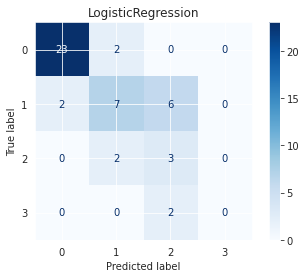

In [318]:
lr_score = cross_val_score(lr_gs.best_estimator_, X_train_processed[logistic_cols], y_train_processed, scoring='f1_weighted')
conf_matrix(lr_gs.best_estimator_, X_train_processed[logistic_cols], y_train_processed, X_test_processed[logistic_cols], y_test_processed)
print('Model: {:<25} Average score and std dev across 5 folds {:0.2}(+/{:0.2})'.format('LogisticRegression', lr_score.mean(), lr_score.std()))

Weighted F1 is the same as when originally run, but individual precision and recall scores went down slightly. 

Now we will try tuning the SVC model.


In [319]:
svc_cols= cols_mod[type(svc_df).__name__]
svc_base = SVC(kernel='linear')
svc_params = {'C': [0.0001, 0.0009, 0.001,.009,0.01,.09,1,5,10,25]} #we will try to determine what the best value for regularization parameter is

svc_gs = GridSearchCV(svc_base, svc_params, cv=2, verbose=2, n_jobs=-1)
svc_gs.fit(X_train_processed[svc_cols], y_train_processed)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.0009, 0.001, 0.009, 0.01, 0.09, 1, 5,
                               10, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [320]:
svc_gs.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The best C parameter is 1, the default, so the score won't be affected. 

Both Logistic Regression and SVC give similar performance on this dataset, and give the highest weighted F1 scores of 0.7.